In [1]:
#Assumption of Linear Regression 

In [2]:
#Import the required Libraries
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load dataset(.csv)
df=pd.read_csv("advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#Drop Unnamed column means to remove unwanted column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


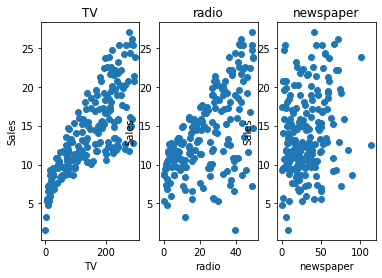

In [8]:
features=["TV","radio","newspaper"] #create list of independent variable means X
Y=df["sales"]
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    X=df[col]
    plt.scatter(X,Y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sales')
   

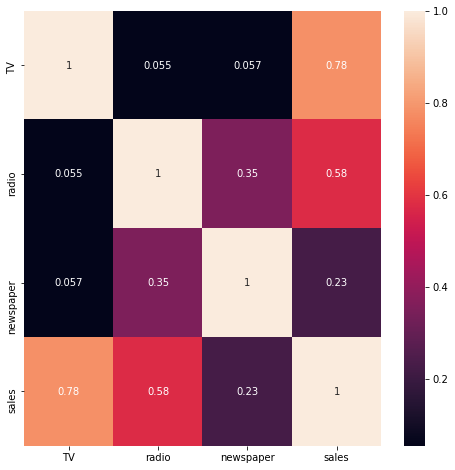

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
#Performing the modeling
#Model with TV

In [11]:
#first Select Input and output variable means X & Y
X=df[["TV"]]  #input always 2D [[]]
Y=df["sales"]  #output always 1D []

In [12]:
#We have to Split these data into train and test 
from sklearn.model_selection import train_test_split

In [13]:
#70% training and 30% testing
#train_test_split() return 4 values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#Perform the linear regression model
#create a object of LinearRegression class
lr=LinearRegression() #lr user defined object of LinearRegression class

In [16]:
#Train the model use fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [17]:
#to display slope,intercept
lr.coef_

array([0.04812204])

In [18]:
lr.intercept_

6.923519536059553

In [19]:
#Lecture 19-Aug-2020

In [20]:
#Testing  : inbuilt function predict() : use for testing

In [21]:
y_pred=lr.predict(X_test)

In [22]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error

In [23]:
m=mean_squared_error(Y_test,y_pred)

In [24]:
#Root Mean Squared Error
rmse=np.sqrt(m)

In [25]:
print("MSE :",m)
print("RMSE : ",rmse)

MSE : 10.571057434656955
RMSE :  3.251316261863333


In [26]:
#Calculate R2-score
from sklearn.metrics import r2_score

In [27]:
r2_score(Y_test,y_pred)   #just ok means it is good 

0.575061860494331

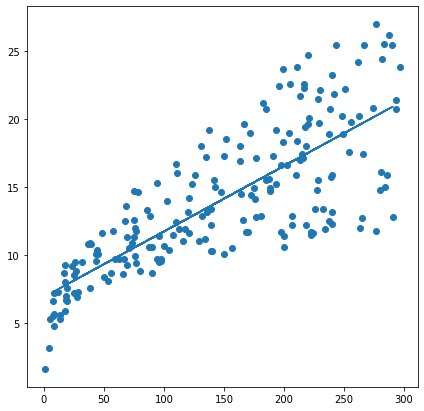

In [28]:
#plot the scatter plot 
plt.figure(figsize=(7,7))
plt.scatter(X,Y)
#Best fit line
plt.plot(X_test["TV"],y_pred)
plt.show()

In [29]:
#Next step with radio
#Modeling with radio 

In [30]:
#first Select Input and output variable means X & Y
X=df[["radio"]]  #input always 2D [[]]
Y=df["sales"]  #output always 1D []

In [31]:
#70% training and 30% testing
#train_test_split() return 4 values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [32]:
#Perform the linear regression model
#create a object of LinearRegression class
lr=LinearRegression() #lr user defined object of LinearRegression class

In [33]:
#Train the model use fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [34]:
#to display slope,intercept
lr.coef_

array([0.1874808])

In [35]:
lr.intercept_

9.440936561425884

In [36]:
#Testing  : inbuilt function predict() : use for testing
y_pred=lr.predict(X_test)

In [37]:
#Mean Squared Error
m=mean_squared_error(Y_test,y_pred)

In [38]:
#Root Mean Squared Error
rmse=np.sqrt(m)

In [39]:
print("MSE :",m)
print("RMSE : ",rmse)

MSE : 14.604130559272193
RMSE :  3.8215351050686674


In [40]:
#Calculate R2-score
r2_score(Y_test,y_pred)   

0.41293932917162335

In [41]:
#Next step with newspaper
#Modeling with newspaper

In [42]:
X=df[["newspaper"]]  #input always 2D [[]]
Y=df["sales"]  #output always 1D []

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [44]:
lr=LinearRegression() 

In [45]:
lr.fit(X_train,Y_train)

LinearRegression()

In [46]:
#slope
lr.coef_

array([0.06532045])

In [47]:
lr.intercept_

11.82966888487788

In [48]:
#Testing  : inbuilt function predict() : use for testing
y_pred=lr.predict(X_test)

In [49]:
#Mean Squared Error
m=mean_squared_error(Y_test,y_pred)

In [50]:
#Root Mean Squared Error
rmse=np.sqrt(m)

In [51]:
print("MSE :",m)
print("RMSE : ",rmse)

MSE : 25.49745237441493
RMSE :  5.049500210358935


In [52]:
#Calculate R2-score
r2_score(Y_test,y_pred)   

-0.024953278429509007

In [53]:
#R2-score of newspapaer is very bad 
#MSE of newspaper :  25.49
#MSE of radio : MSE : 14.604130559272193
#MSE of TV : MSE : 10.571057434656955

# Multiple Linear Regression 

In [104]:
X=df[["TV","radio","newspaper"]]  #X1=TV  X2=radio  X3=newspaper
Y=df["sales"]
#equation of multiple linear regression
#Y=m1X1+m2X2+m3X3+b
# sales=m1*TV+m2*radio+m3*newspaper+b

In [105]:
#70% training and 30% testing
#train_test_split() return 4 values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [106]:
#Perform the linear regression model
#create a object of LinearRegression class
lr=LinearRegression() #lr user defined object of LinearRegression class

In [107]:
#Train the model use fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [108]:
#Check score of Train
lr.score(X_train,Y_train)

0.8850053786777522

In [109]:
#Check score of test
lr.score(X_test,Y_test)

0.9224605706201434

In [ ]:
#Ridge and Lasso Regularization

In [110]:
from sklearn.linear_model import Lasso  #lambda*sum(abs(coef))  ==>error term add
from sklearn.linear_model import Ridge  #lambda*sum(square(coef))  ==>error term add


In [ ]:
#To check coefficient before apply regularization
# To show coefficient of all variables 

In [111]:
#find slope 
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [112]:
#Apply Regularization with Ridge
#To create the object of Ridge class and pass the parameter means value of lambda /hyperparameter
l2=Ridge(10) #here 10 ->value of lambda select 0.1  to 50
l2.fit(X_train,Y_train)

Ridge(alpha=10)

In [113]:
#Again check coefficient
l2.coef_

array([0.04695172, 0.17652122, 0.00186978])

In [114]:
#Apply Regularization with Lasso
#To create the object of Lasso class and pass the parameter means value of lambda /hyperparameter
l1=Lasso(1000) #here 1000 ->value of lambda
l1.fit(X_train,Y_train)

Lasso(alpha=1000)

In [115]:
#Again check coefficient
l1.coef_

array([0., 0., 0.])

In [59]:
#slope of Tv : previous 0.048   present : 0.046
#slope of radio : previous :0.187    present :  0.176
#slope of newspaper : previous :0.0653    present :  0.0018

In [60]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [61]:
'''The correlation between independent variables radio and newspaper are 0.35 ,the concept of 
Multicolinearity that means radio is correlated with target variables sales and newspaper is
correlated with radio that means indirectly newspaper also getting correlated with sales '''
# A -> B   and  A ->C then B ->C
#radio ->sales and radio->newspaper  then indirectly newspaper ->sales
# We remove newspaper
# and create a model with TV and radio 

'The correlation between independent variables radio and newspaper are 0.35 ,the concept of \nMulticolinearity that means radio is correlated with target variables sales and newspaper is\ncorrelated with radio that means indirectly newspaper also getting correlated with sales '

In [62]:
#  create a model with TV and radio 
X=df[["TV","radio"]]  #X1=TV  X2=radio  
Y=df["sales"]

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [64]:
#create a object of LinearRegression class
lr=LinearRegression()

In [65]:
#Train the model use fit()
lr.fit(X_train,Y_train)

LinearRegression()

In [66]:
#find slope 
lr.coef_

array([0.04697554, 0.17765046])

In [67]:
#slope of Tv : previous 0.048   present : 0.046   remove newspaper slope : 0.046
#slope of radio : previous :0.187    present :  0.176    remove newspaper slope : 0.177
#slope of newspaper : previous :0.0653    present :  0.0018

In [68]:
#intercept
lr.intercept_

2.9647671191401574

In [69]:
#Testing  : inbuilt function predict() : use for testing
y_pred=lr.predict(X_test)

In [70]:
#Mean Squared Error
m=mean_squared_error(Y_test,y_pred)

In [71]:
#Root Mean Squared Error
rmse=np.sqrt(m)

In [72]:
print("MSE :",m)
print("RMSE : ",rmse)

MSE : 1.9147050289721803
RMSE :  1.3837286688408896


In [73]:
#Calculate R2-score
r2_score(Y_test,y_pred)    

0.92303218502568

In [74]:
#It is very good score because r2-score very close to 1

In [75]:
#Lecture 20-Aug-2020 

In [76]:
#not possible 3D plot  so find out residual of each datapoint
#calculate the residual 
residual=Y_test-y_pred

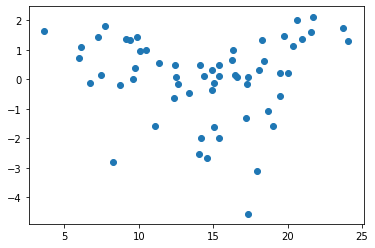

In [77]:
#we plot residual and y_pred here y_pred : independent variable and residual : dependent variable
plt.scatter(y_pred,residual)
plt.show()

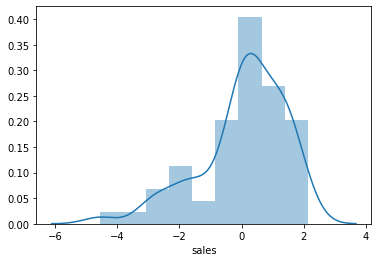

In [78]:
#Check last assumption :
#we plot residual error  we use frequency graph 
sns.distplot(residual)
plt.show()

In [79]:
#polynomial regression 

In [80]:
#we create a function for SLR
def poly_1(x):    #y=mx+b here suppose randomly m=4 and b=5  and degree of x=1 degree means power
    y=4*x+5
    return y
# Quadratic polynomials  degree of x=2    quadratic eq. ax^2+bx+c=0  y=m1x1^2+m2x1+b
def poly_2(x):
    y=6*(x**2)+4*(x)+5    #suppose m1=6 , m2=4 and b=5
    return y
#cubic  degree of x=3  eq. ax^3+bx^2+cx+d=0  y=m1x1^3+m2x1^2+m3x1+b
def poly_3(x):
    y=8*(x**3)+6*(x**2)+4*(x)+5  #suppose m1=8 ,m2=6 m3=4 b=5
    return y
#create a function for plot
def plot(x,y):
    plt.plot(x,y)
    plt.show()

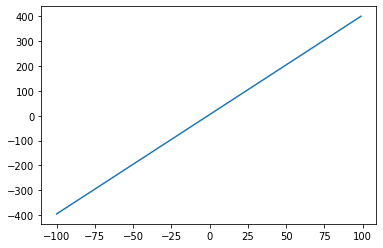

In [81]:
#call in main
x=np.arange(-100,100) #start=-100 stop=100(100-1=99) default step=+1 series -100,-99,-98 ,...0,1,2..99
#To check the linear relationship
#plot linear relationship
y= poly_1(x)
plot(x,y)

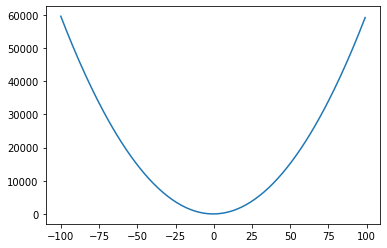

In [82]:
#plot Quadratic relation
#Now taking out the Quadratic relationship
y=poly_2(x)
plot(x,y)

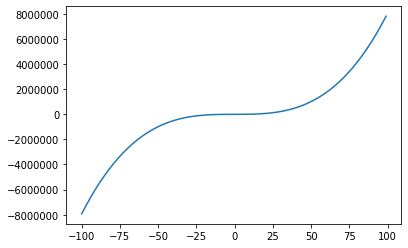

In [83]:
#Then lastly we can perfrom for cubic relationship as well
y=poly_3(x)
plot(x,y)

In [84]:
#Now we perform the Actual polynomials regression of our dataset advertising.csv

In [85]:
X=df[["TV","radio"]]  #X1=TV  X2=radio  Y=m1*Tv+m2*t=radio+b
Y=df["sales"]

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
#create the object of PolynomialFeatures class
pf=PolynomialFeatures(2) #here pass how much degree means here2 means degree x=2
#we create polynomila version of X so we call fit_transform() ->inbuilt function of PolynomialFeatures
#class

In [88]:
X_poly=pf.fit_transform(X)  #ax^2+bx+c=0  Y=(m1*X1^2+m2*X1)+(m3*X2^2+m4*X2)+b

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=1)

In [90]:
#Create the object of LinearRegression
lr=LinearRegression()

In [91]:
#We train the model
lr.fit(X_train,Y_train)

LinearRegression()

In [92]:
#We can perform the prediction  then calling predict function 
y_pred=lr.predict(X_test)

In [93]:
#We check the mean squared error and r2-score
mean_squared_error(Y_test,y_pred)

0.17238345081008266

In [94]:
r2_score(Y_test,y_pred) 

0.9930704848288263

In [95]:
#great r2-score It is very cloae to 1

In [96]:
#Checked the assumption 
residual=Y_test-y_pred

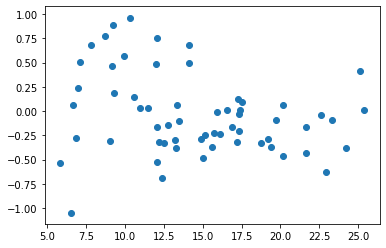

In [97]:
plt.scatter(y_pred,residual)
plt.show()

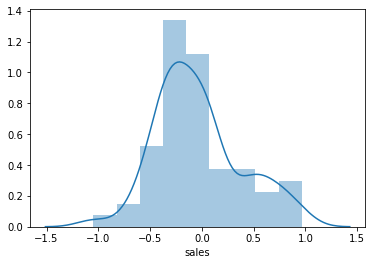

In [98]:
sns.distplot(residual)
plt.show()